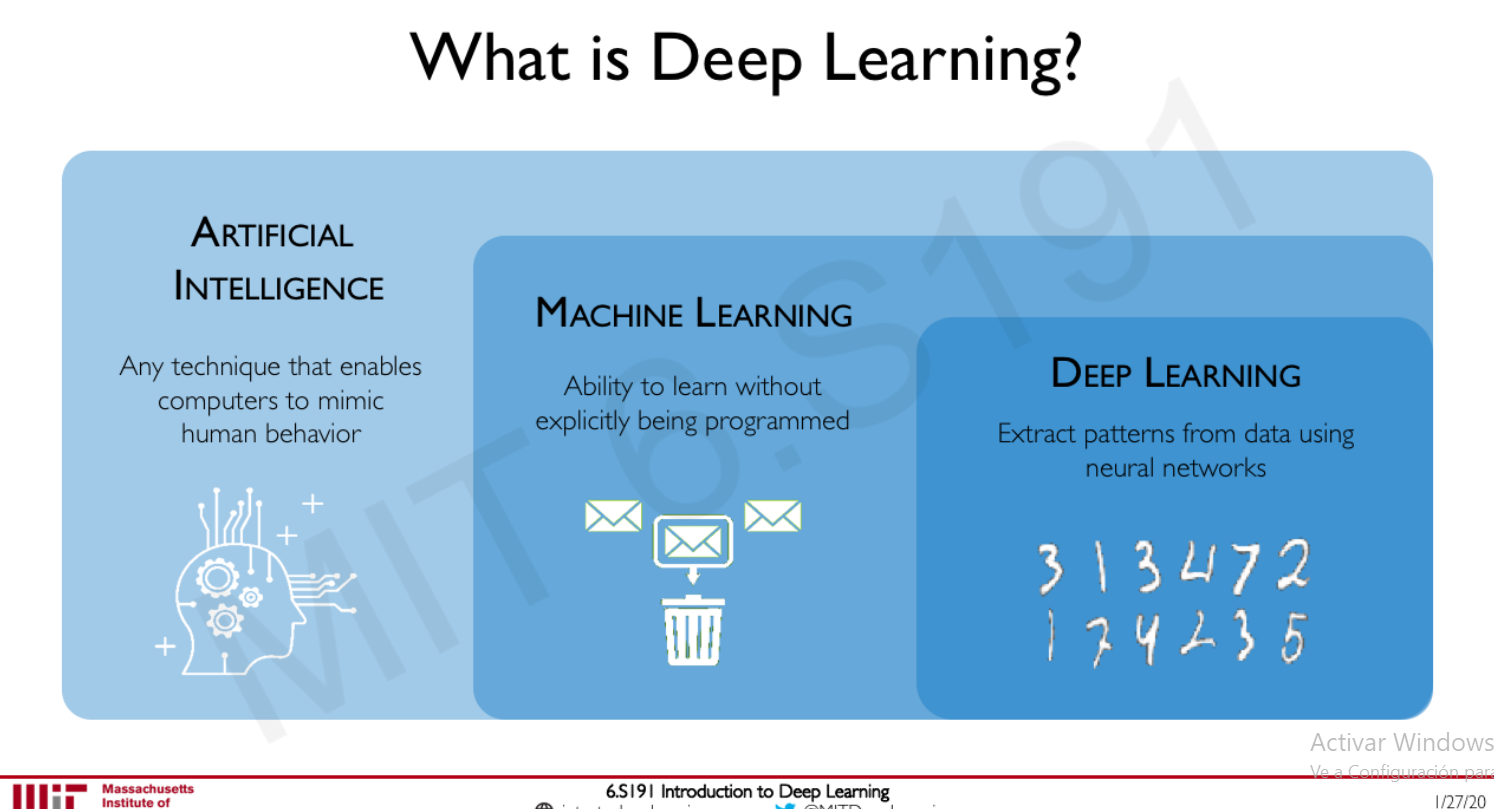

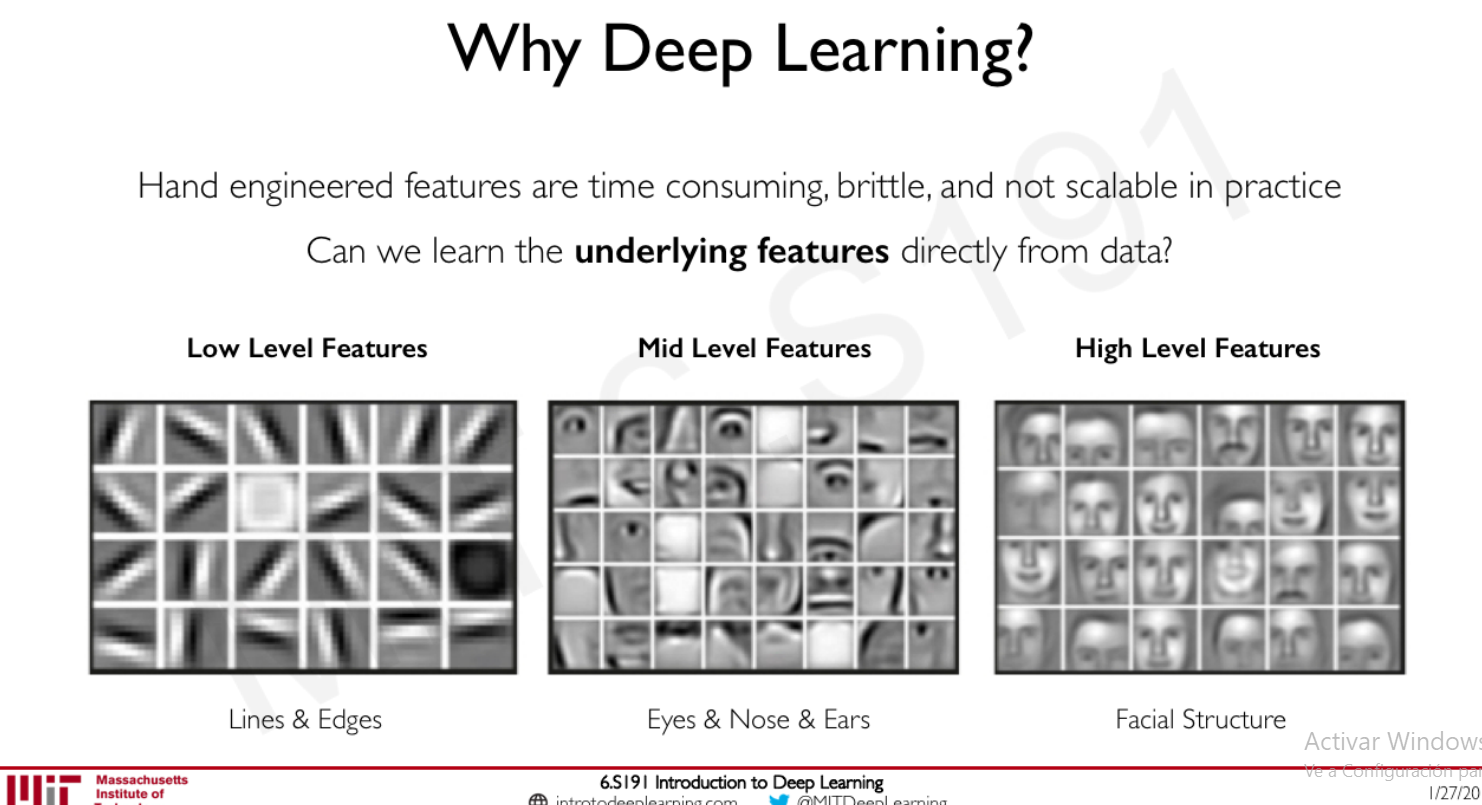

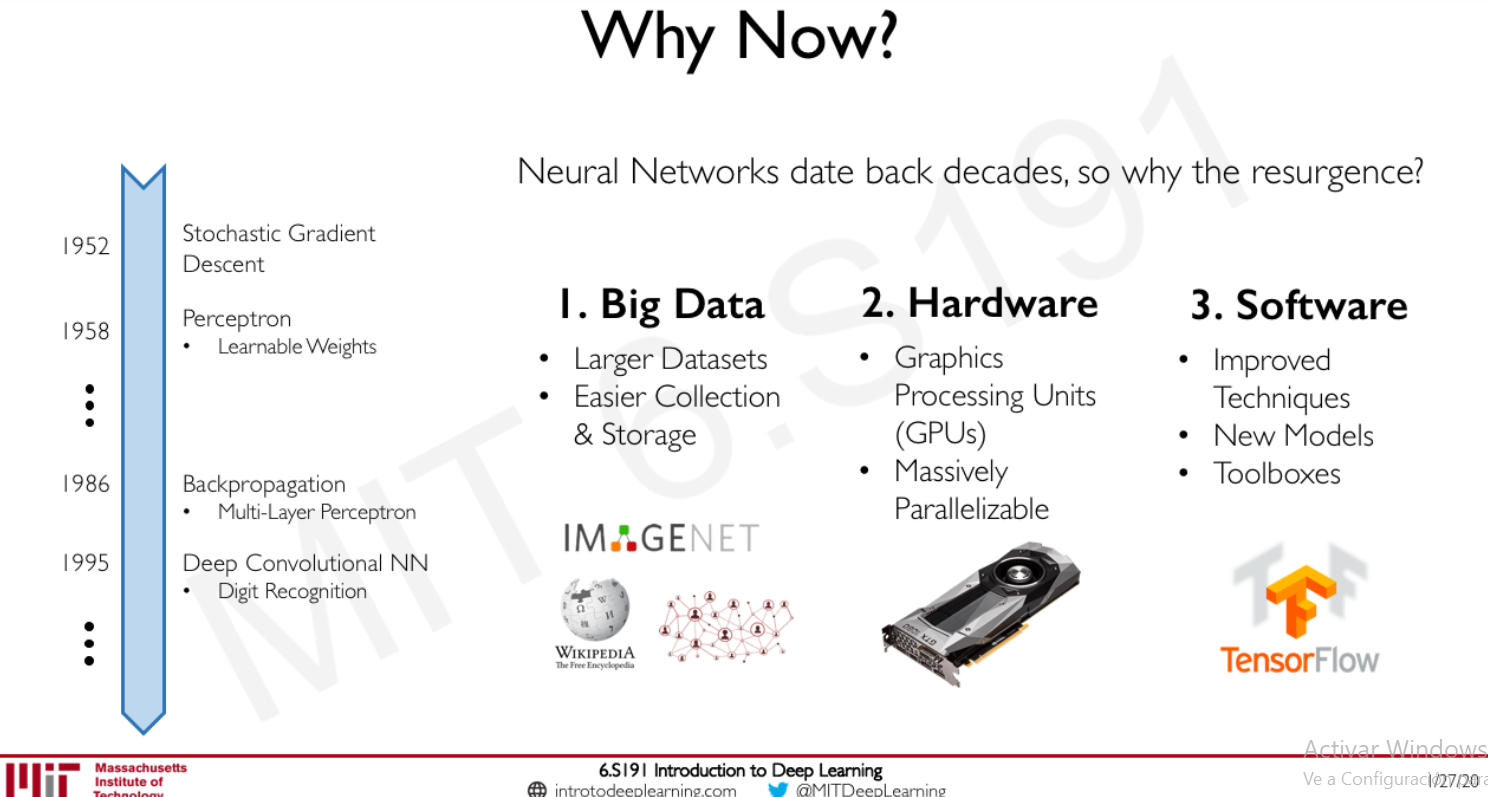

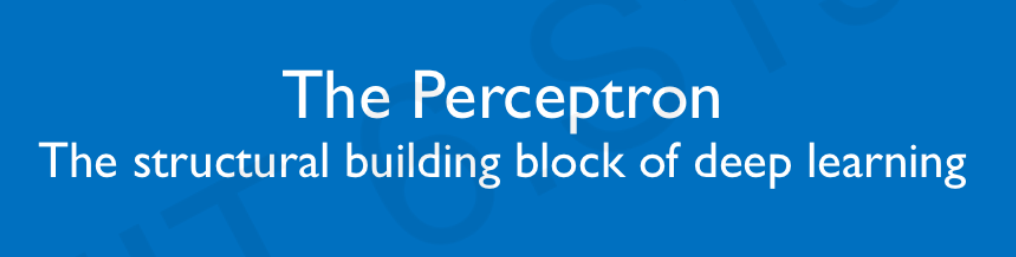

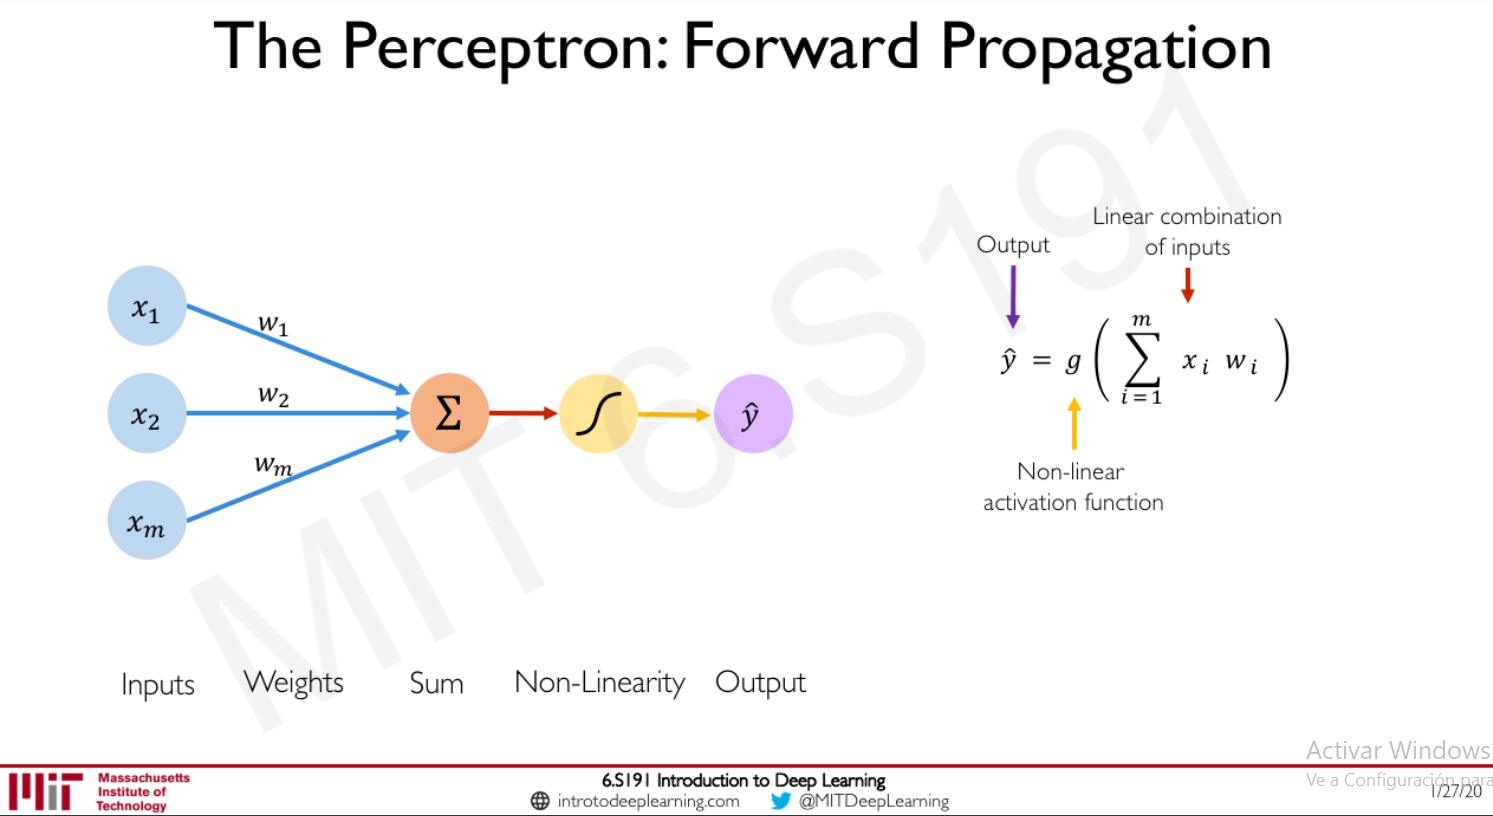

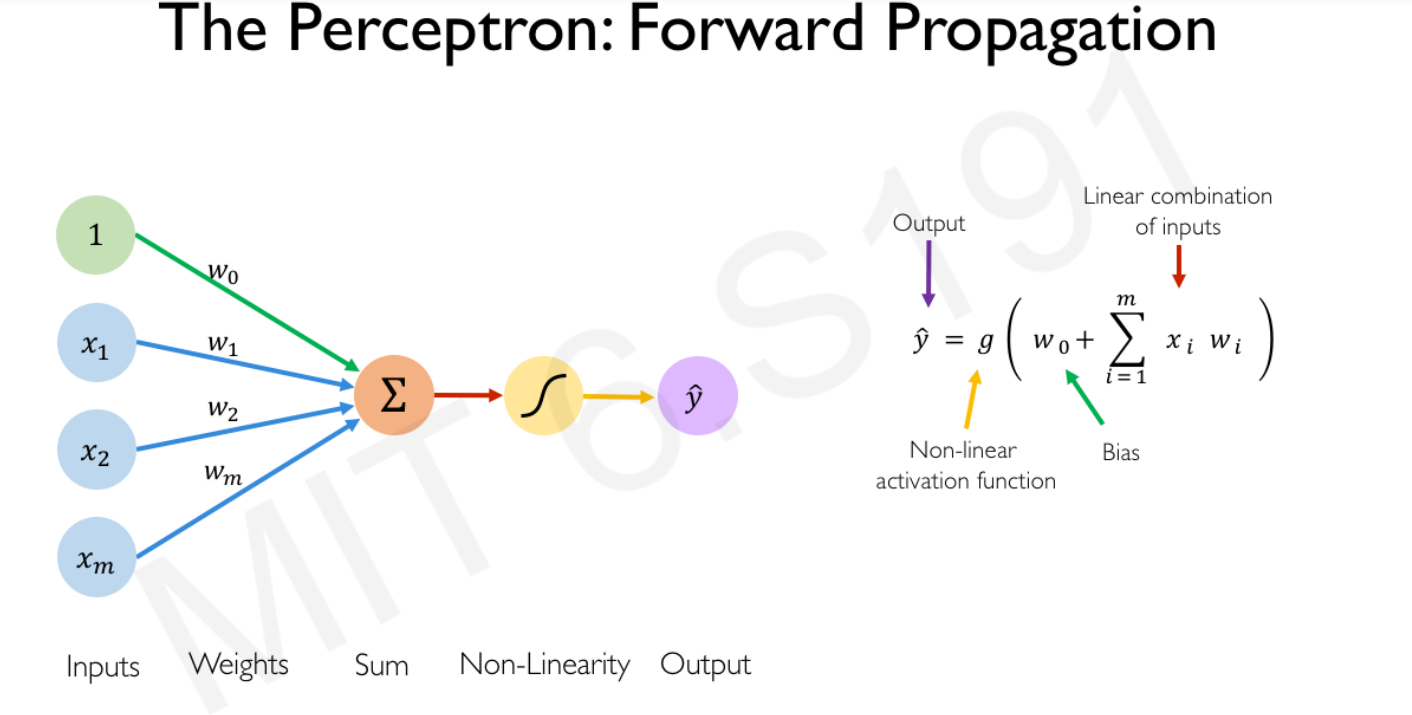

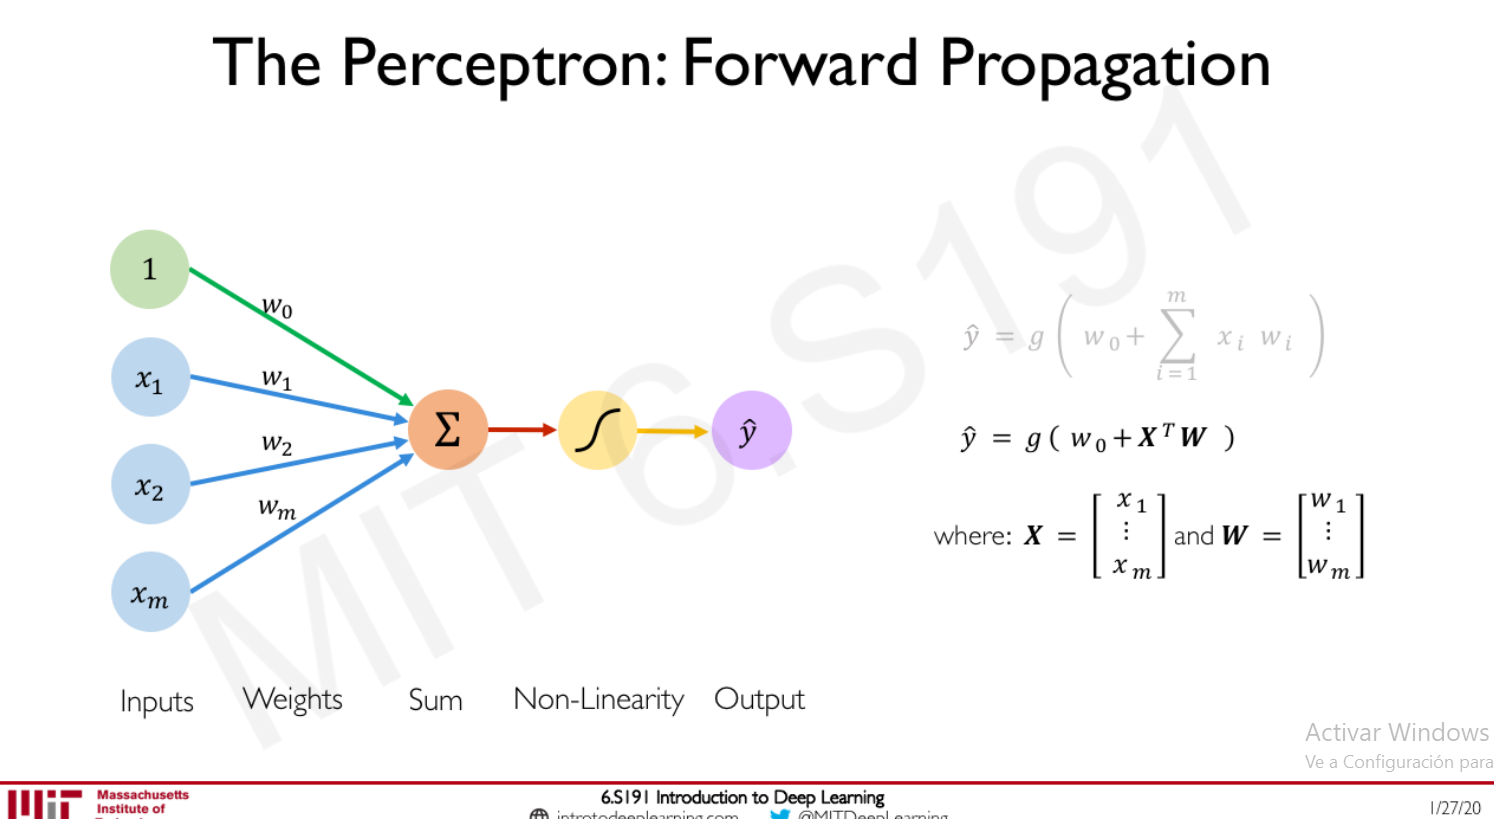

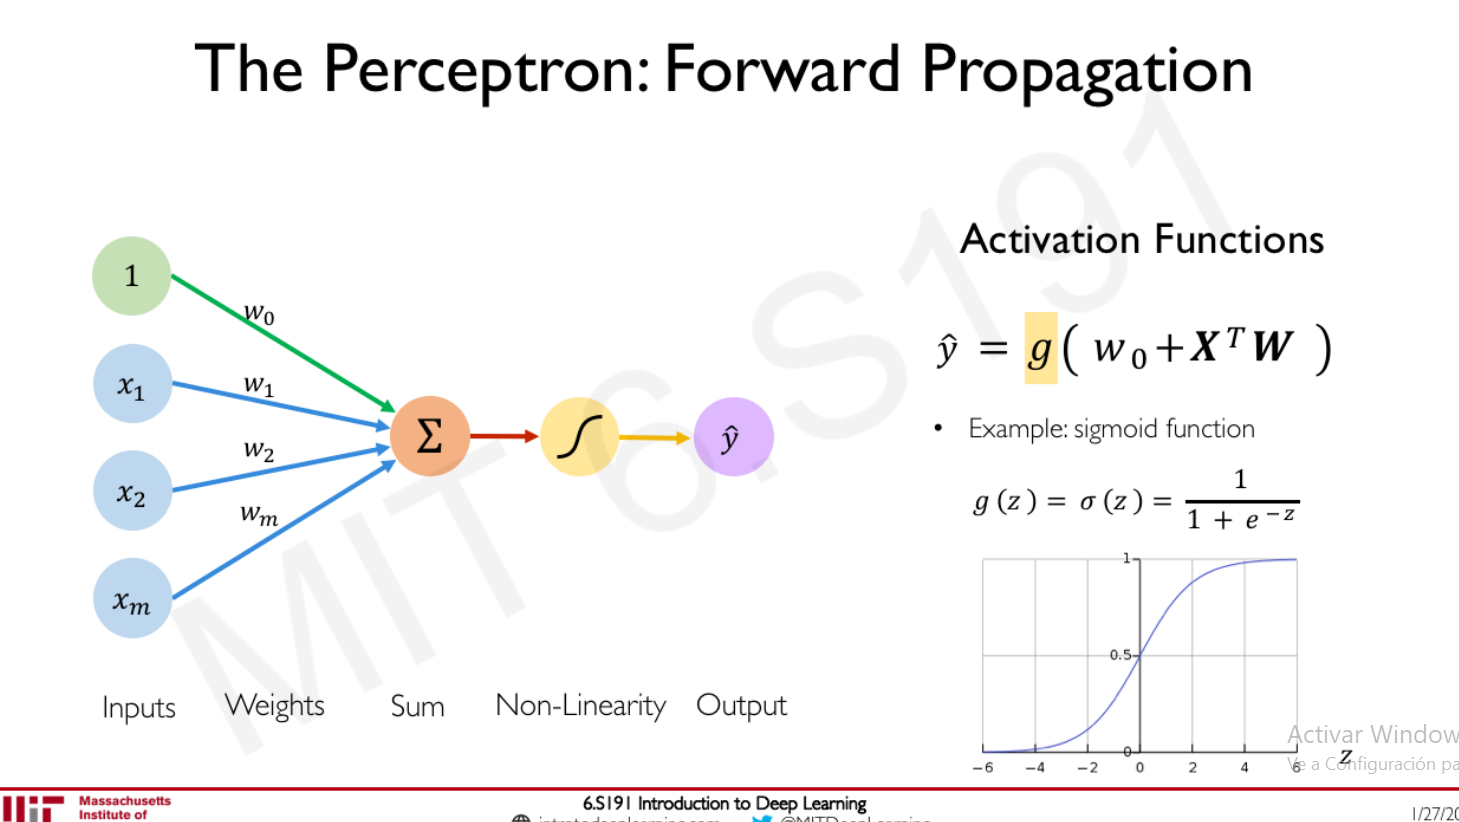

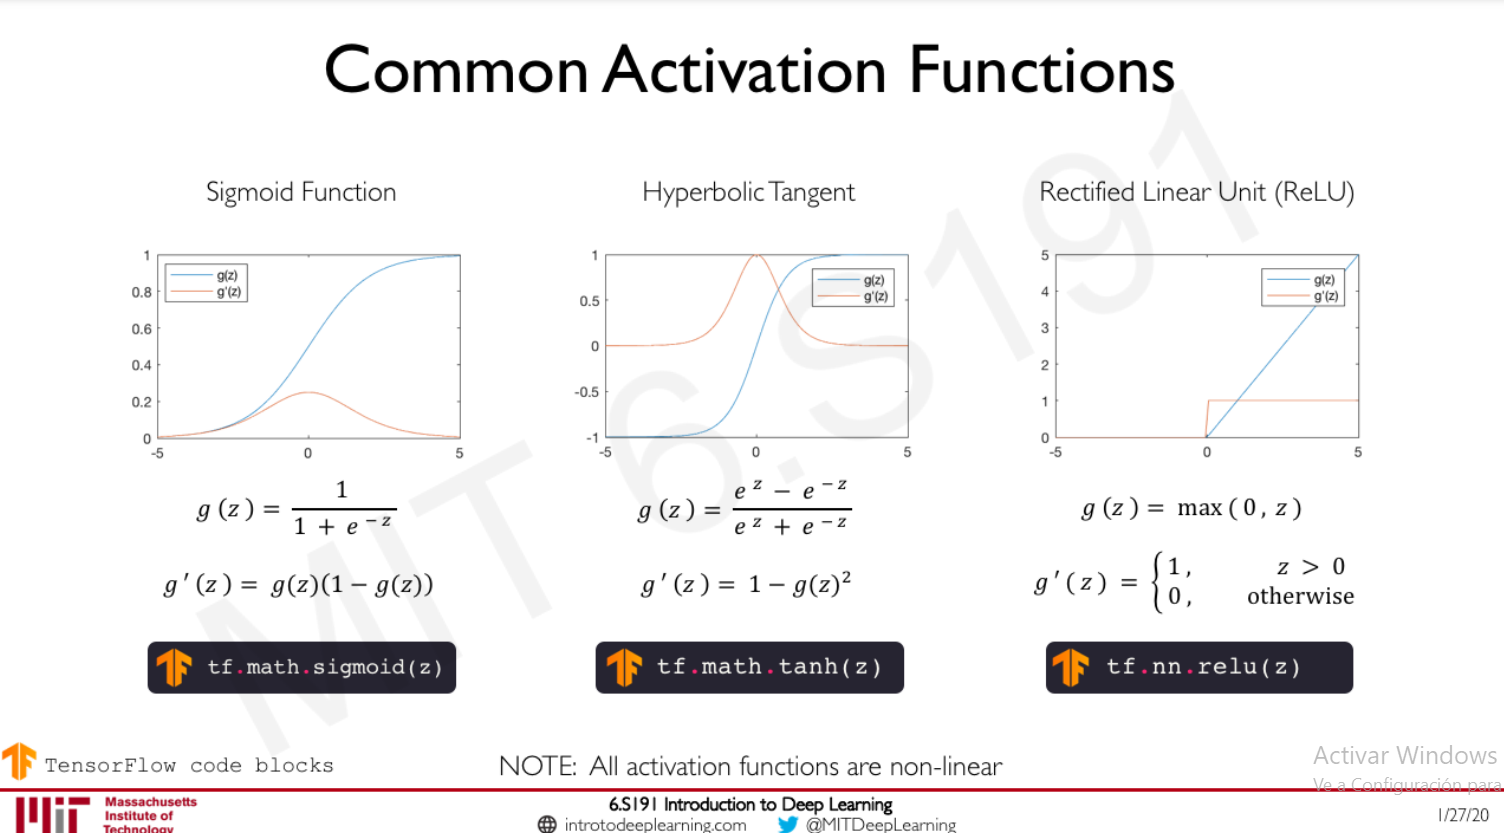

In [ ]:
import tensorflow as tf

# Sigmoid function
def sigmoid(x):
    return tf.math.sigmoid(x)

# Hyperbolic tangent (tanh) function
def tanh(x):
    return tf.math.tanh(x)

# ReLU (Rectified Linear Unit) function
def relu(x):
    return tf.nn.relu(x)

# Test the functions
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

# Apply sigmoid
result_sigmoid = sigmoid(x)
print("Sigmoid:", result_sigmoid.numpy())

# Apply tanh
result_tanh = tanh(x)
print("Tanh:", result_tanh.numpy())

# Apply ReLU
result_relu = relu(x)
print("ReLU:", result_relu.numpy())

Sigmoid: [0.11920292 0.26894143 0.5        0.7310586  0.8807971 ]
Tanh: [-0.9640276 -0.7615942  0.         0.7615942  0.9640276]
ReLU: [0. 0. 0. 1. 2.]


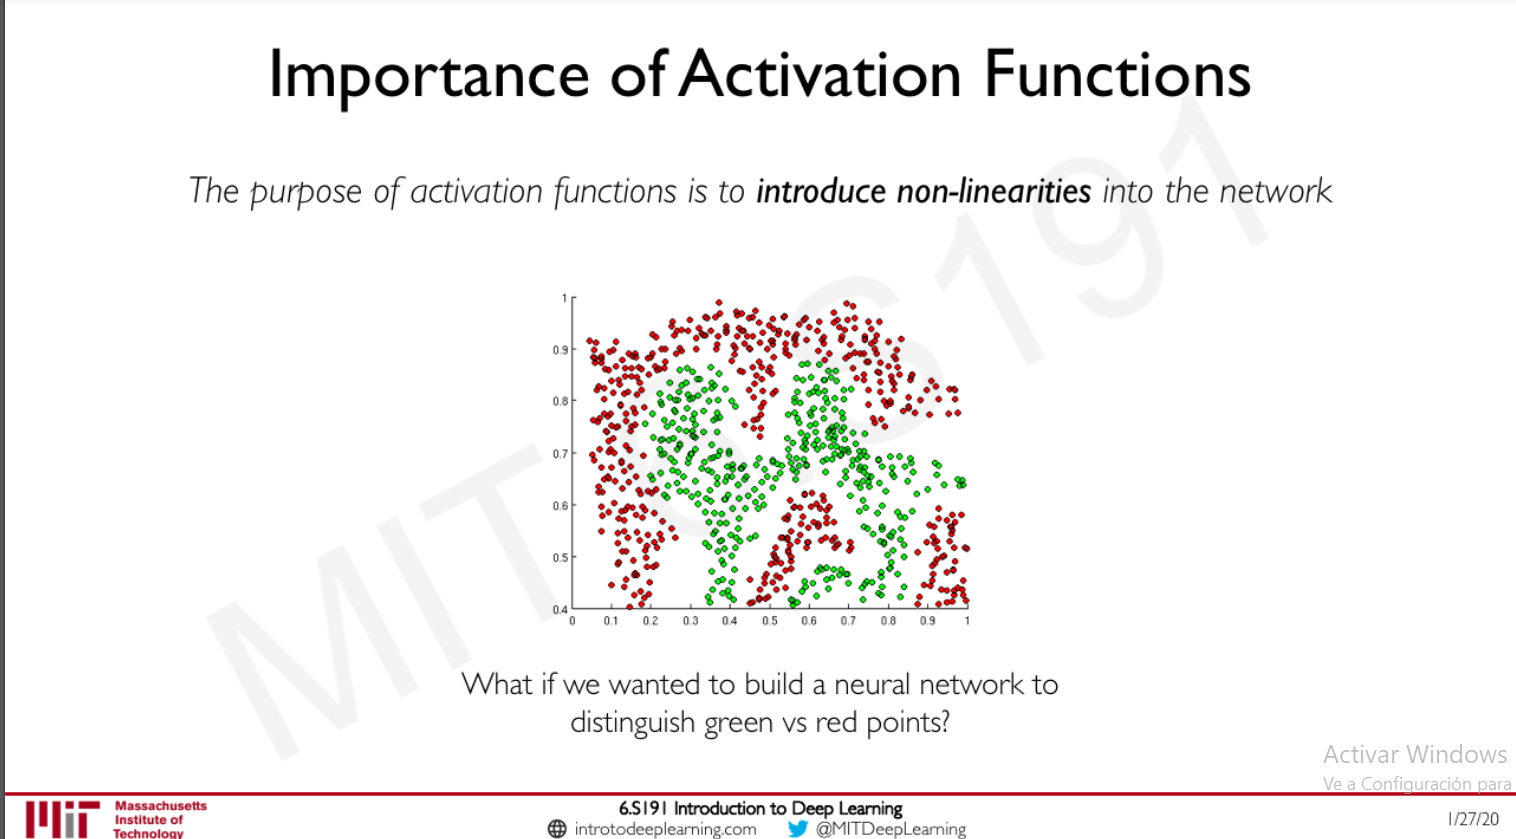

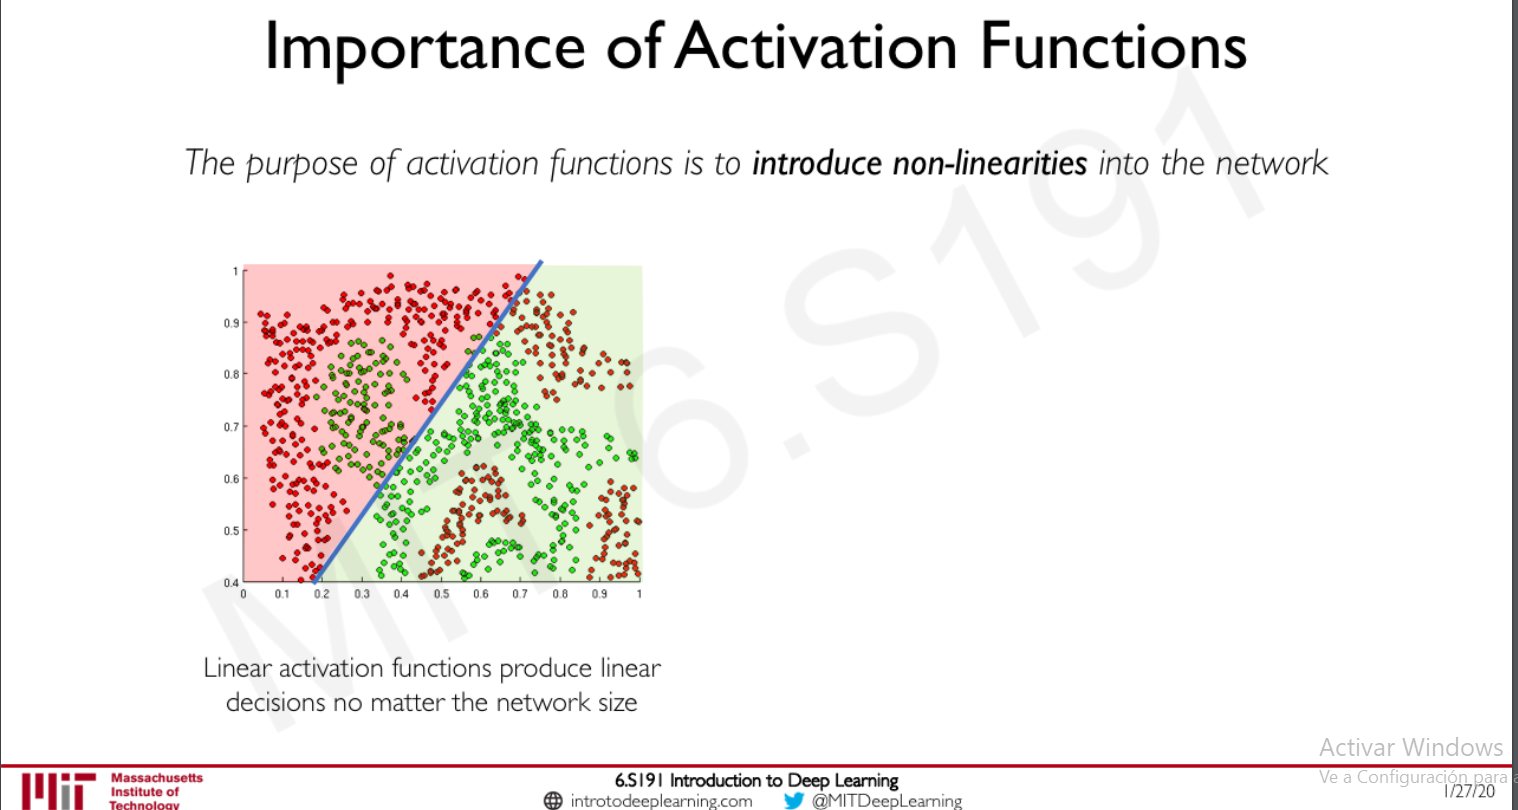

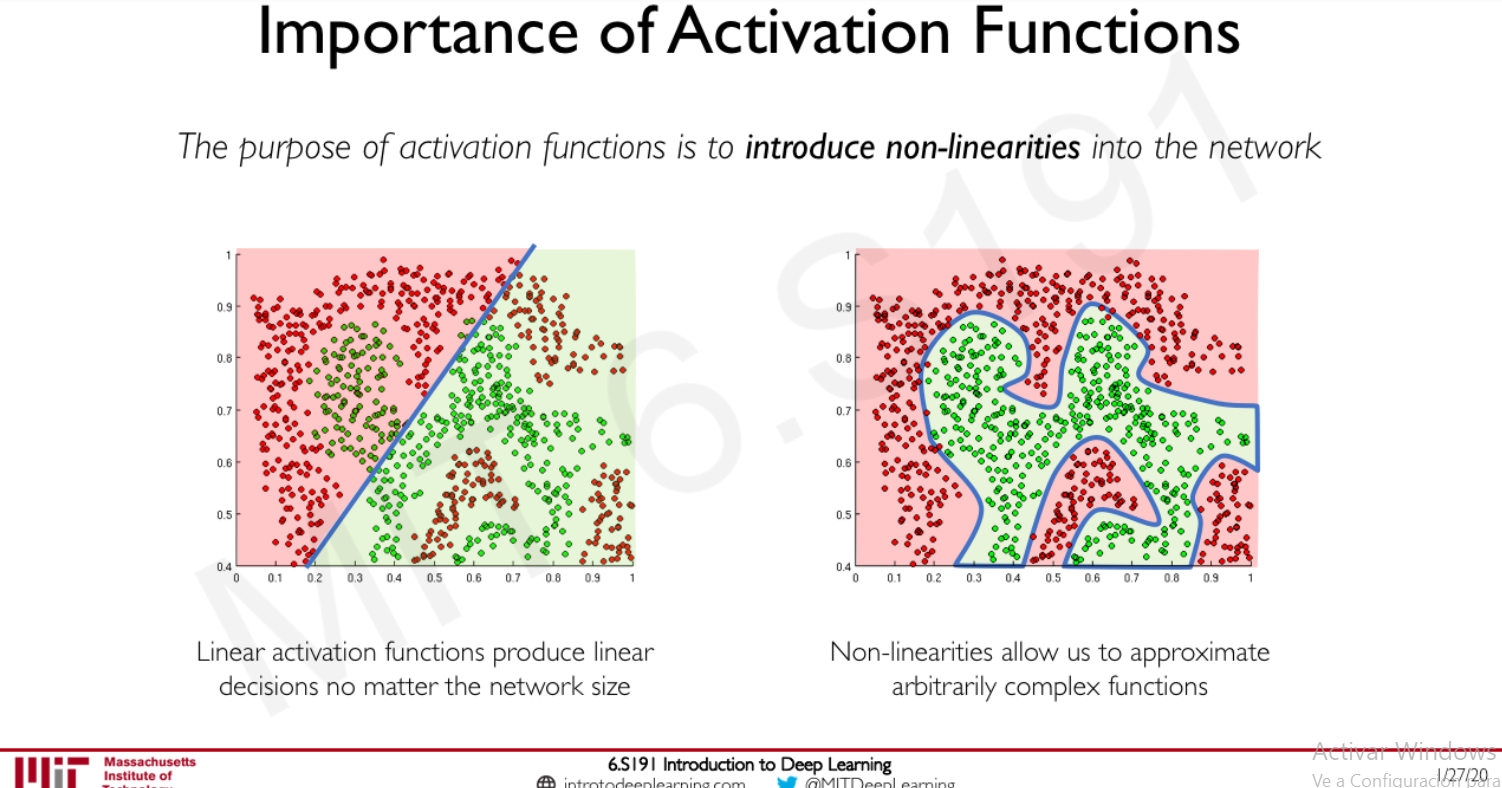

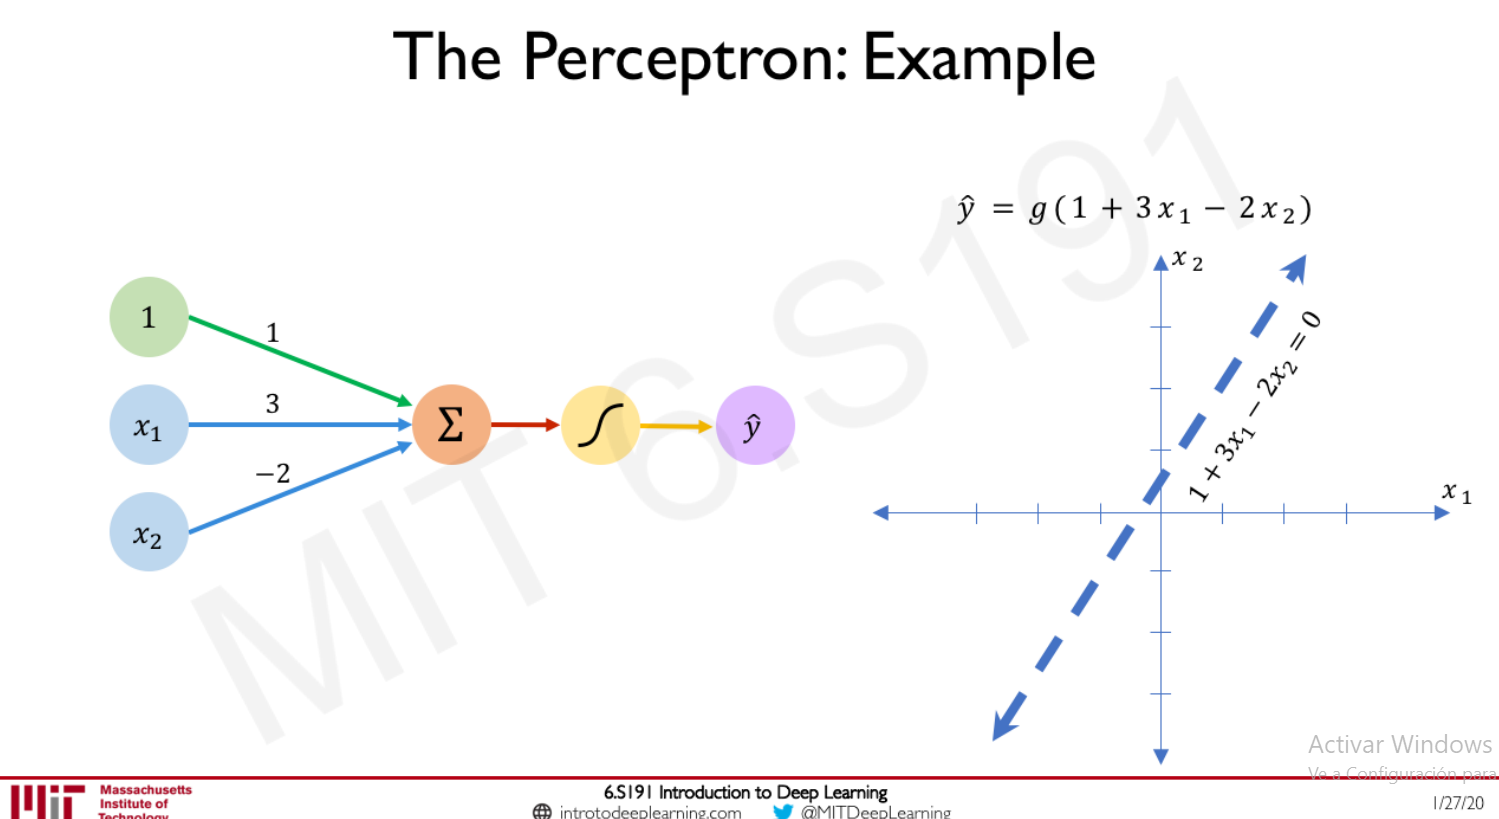

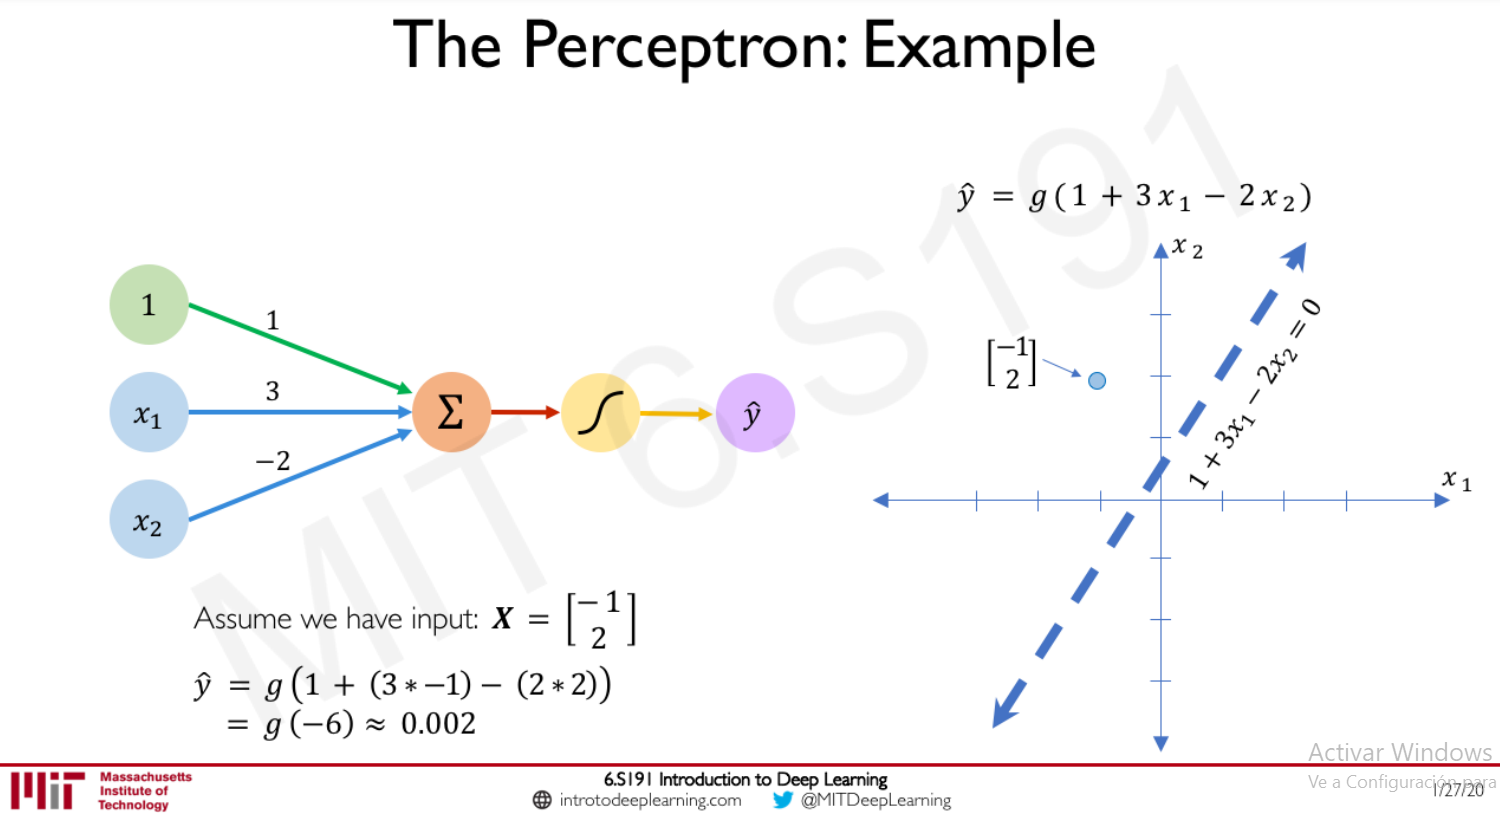

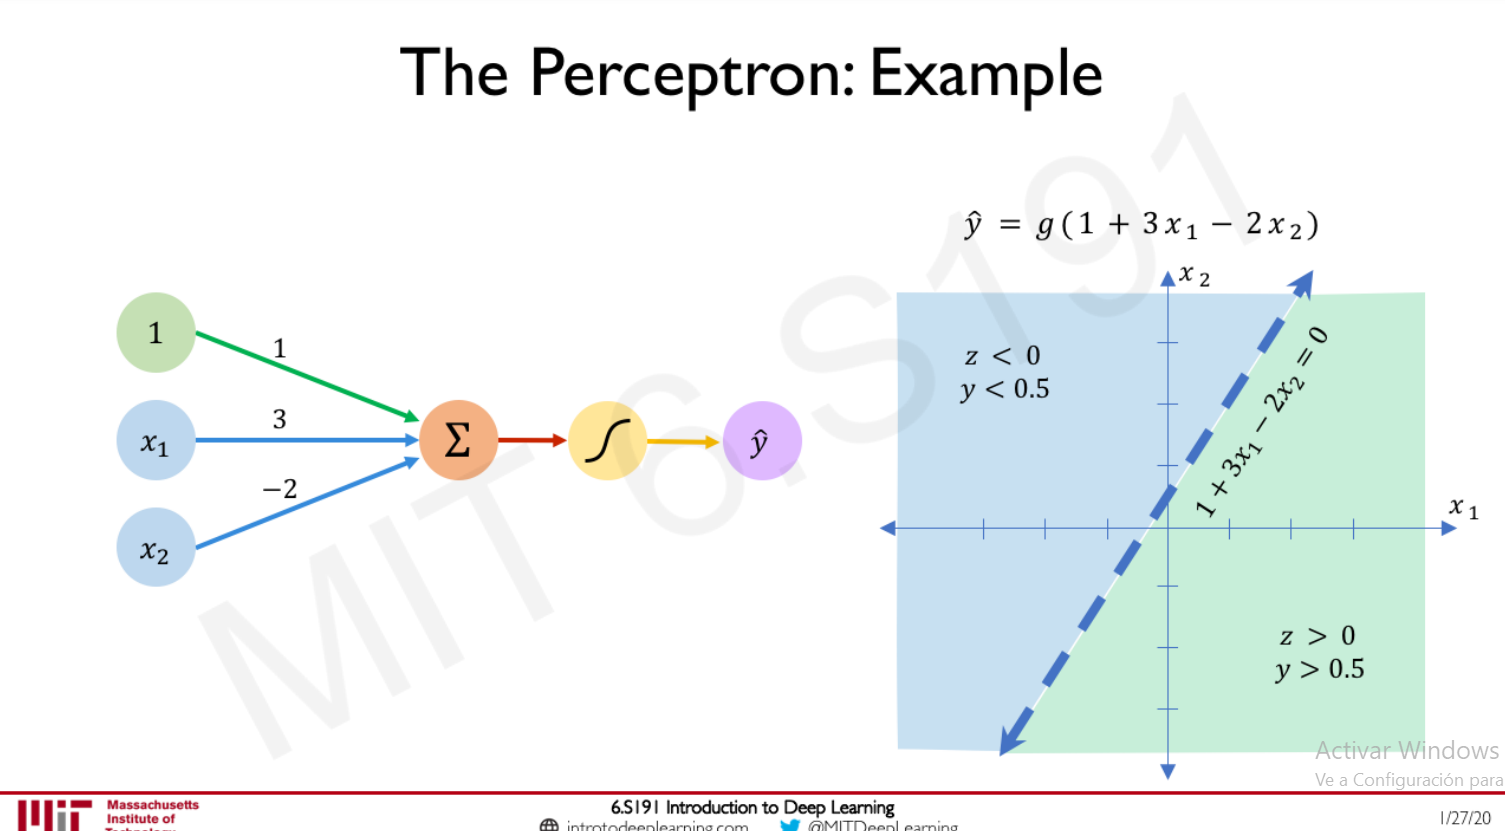

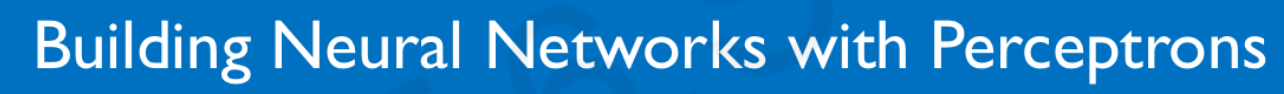

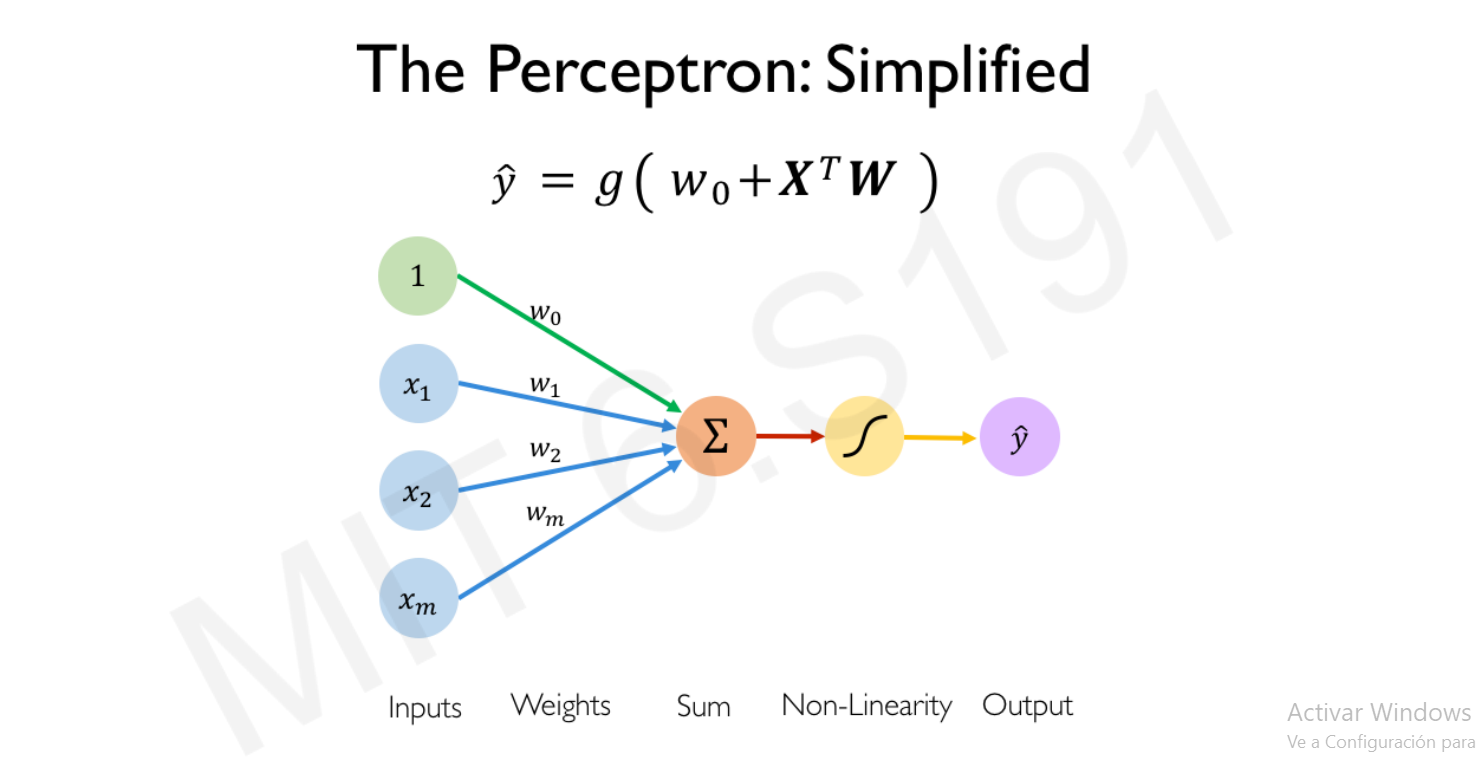

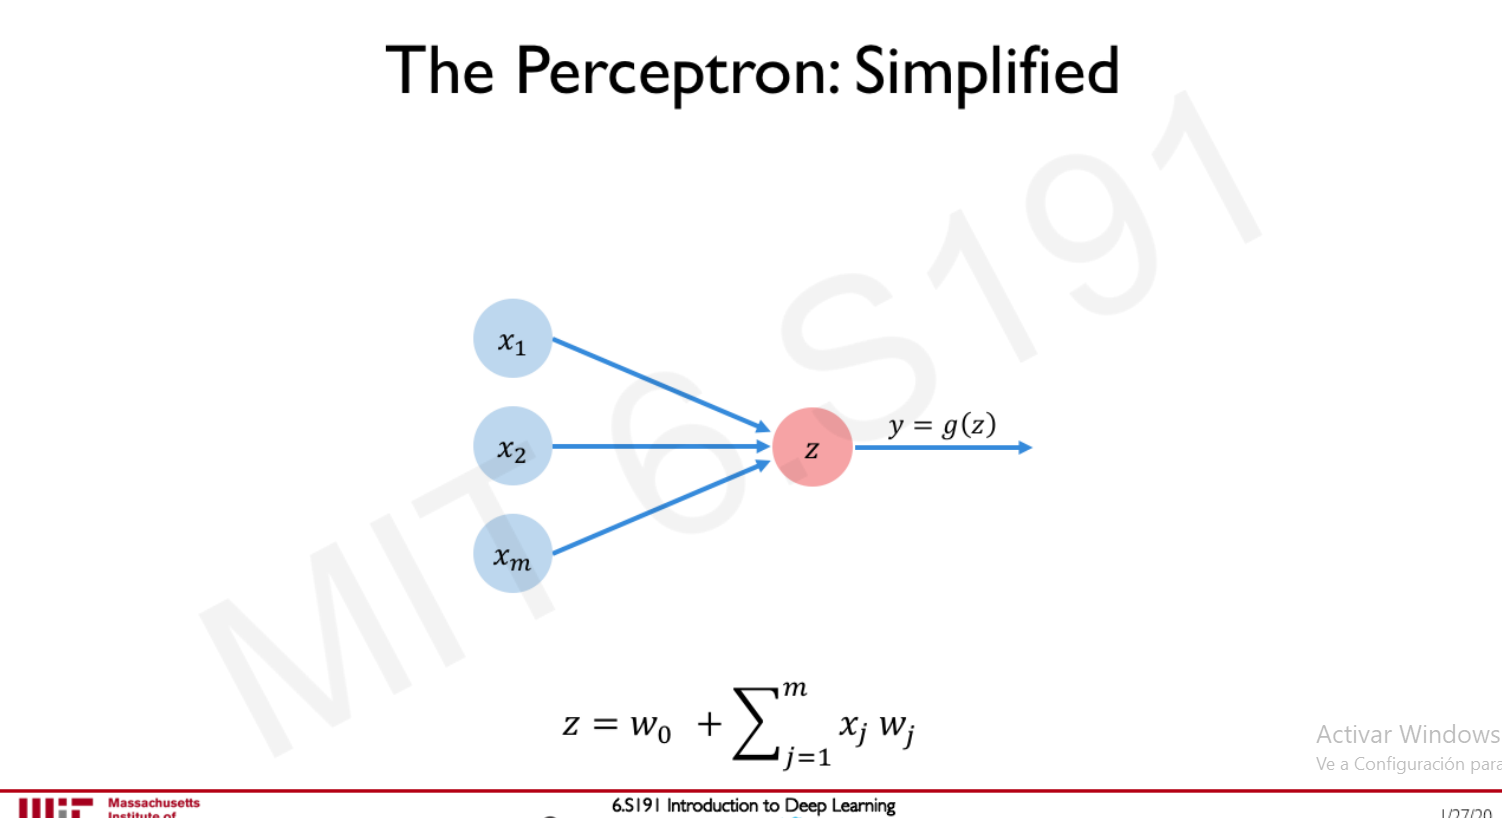

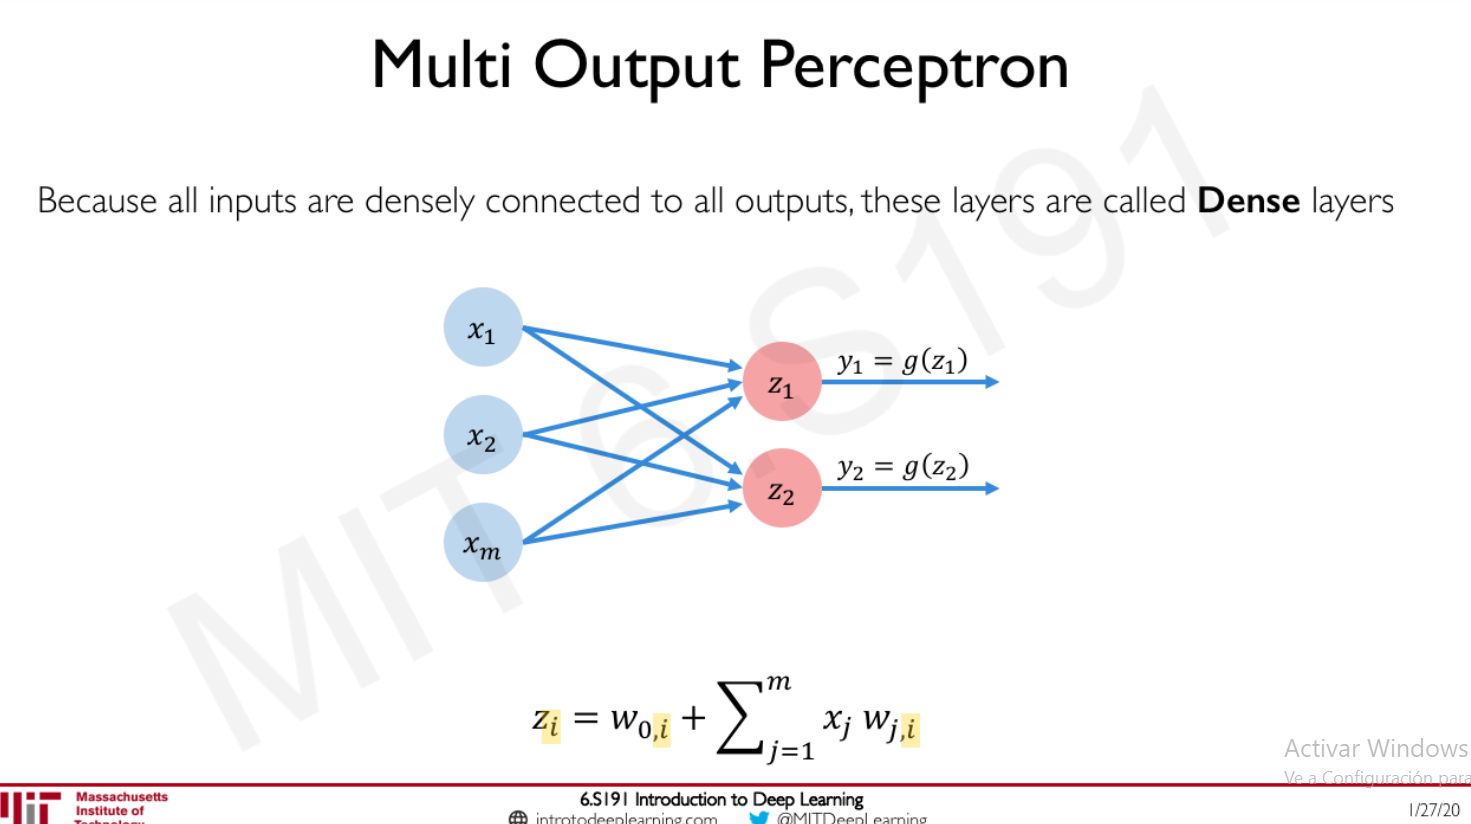

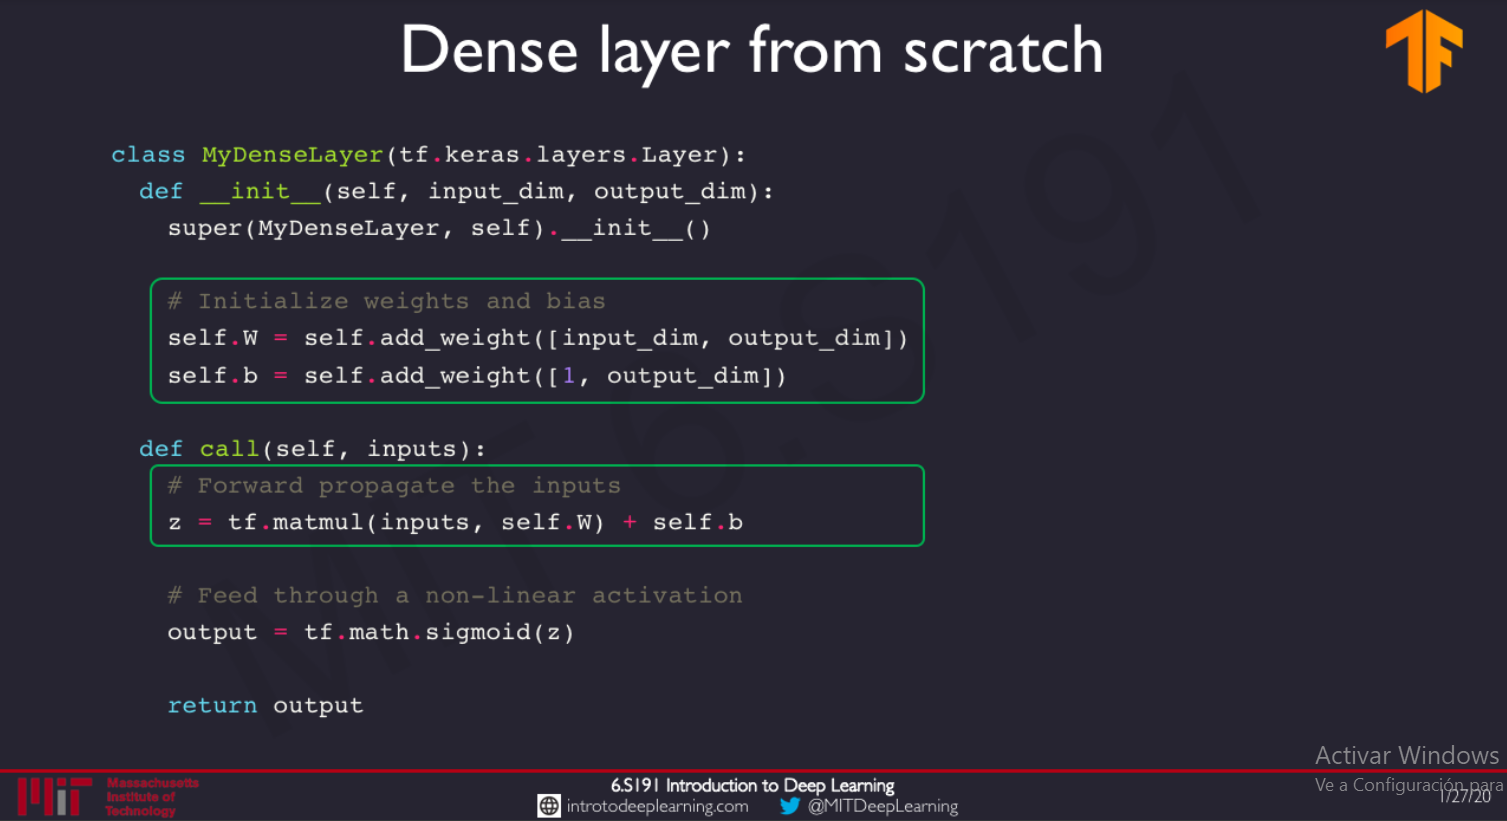

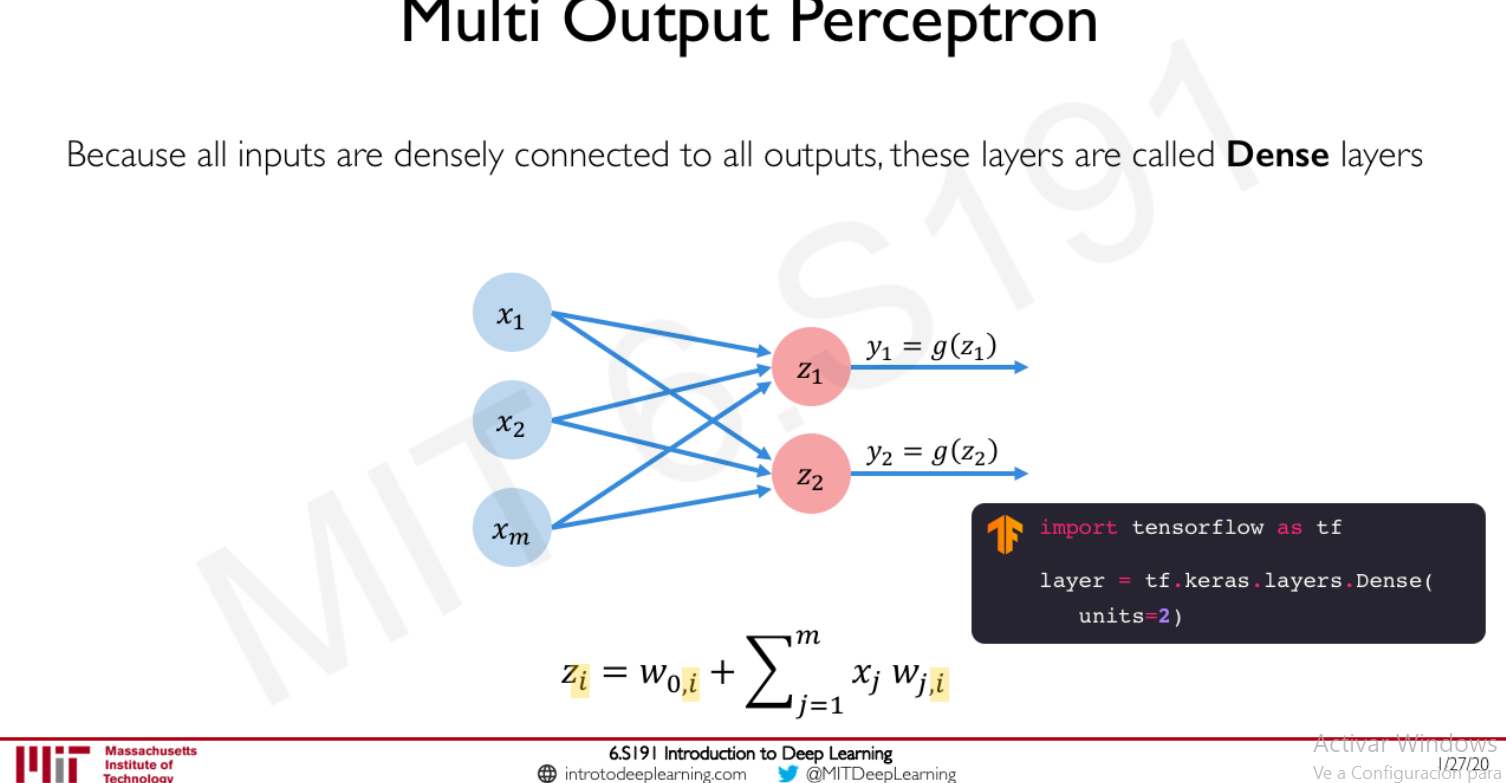

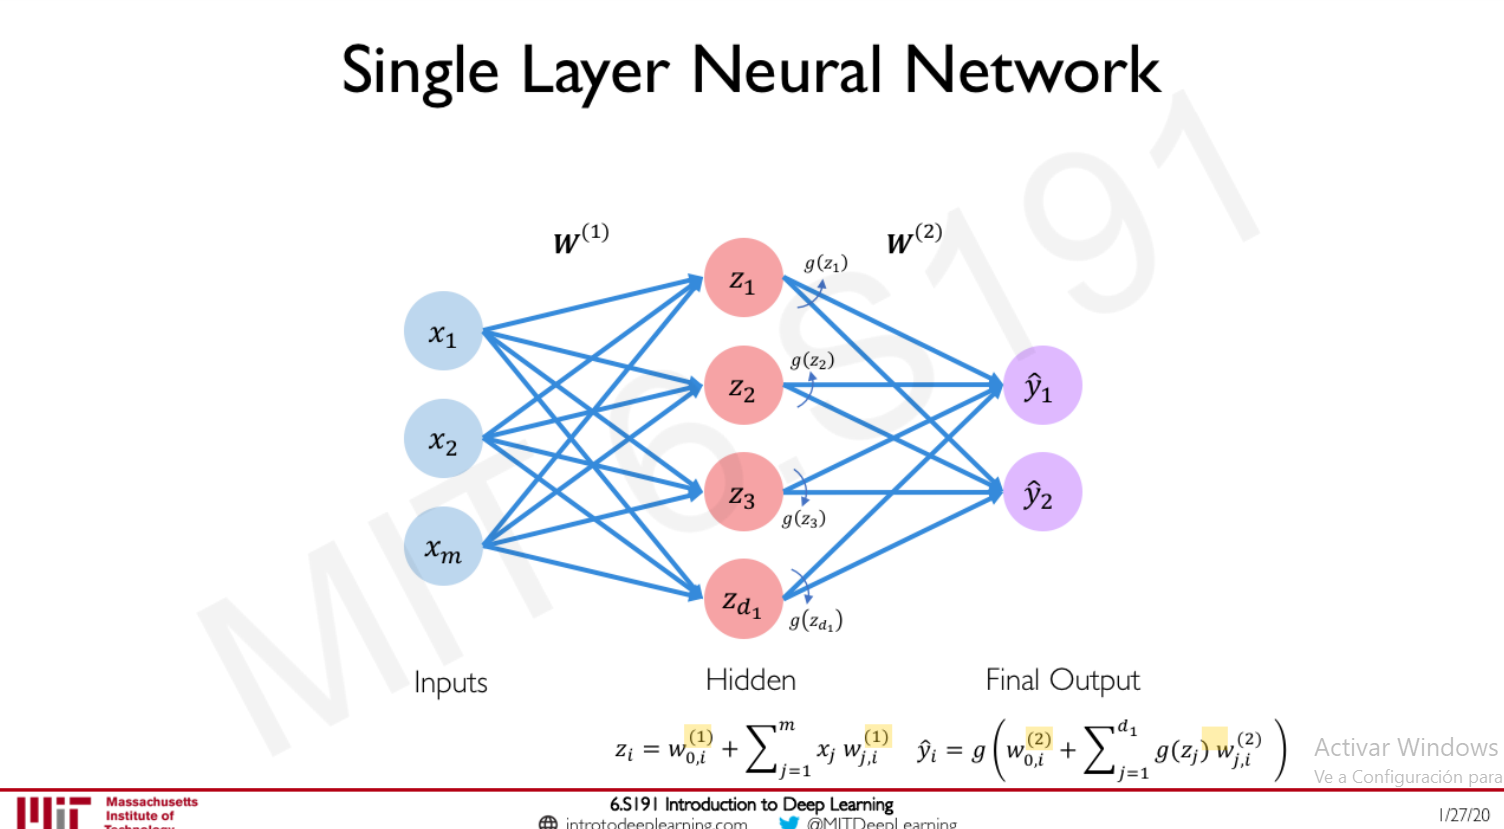

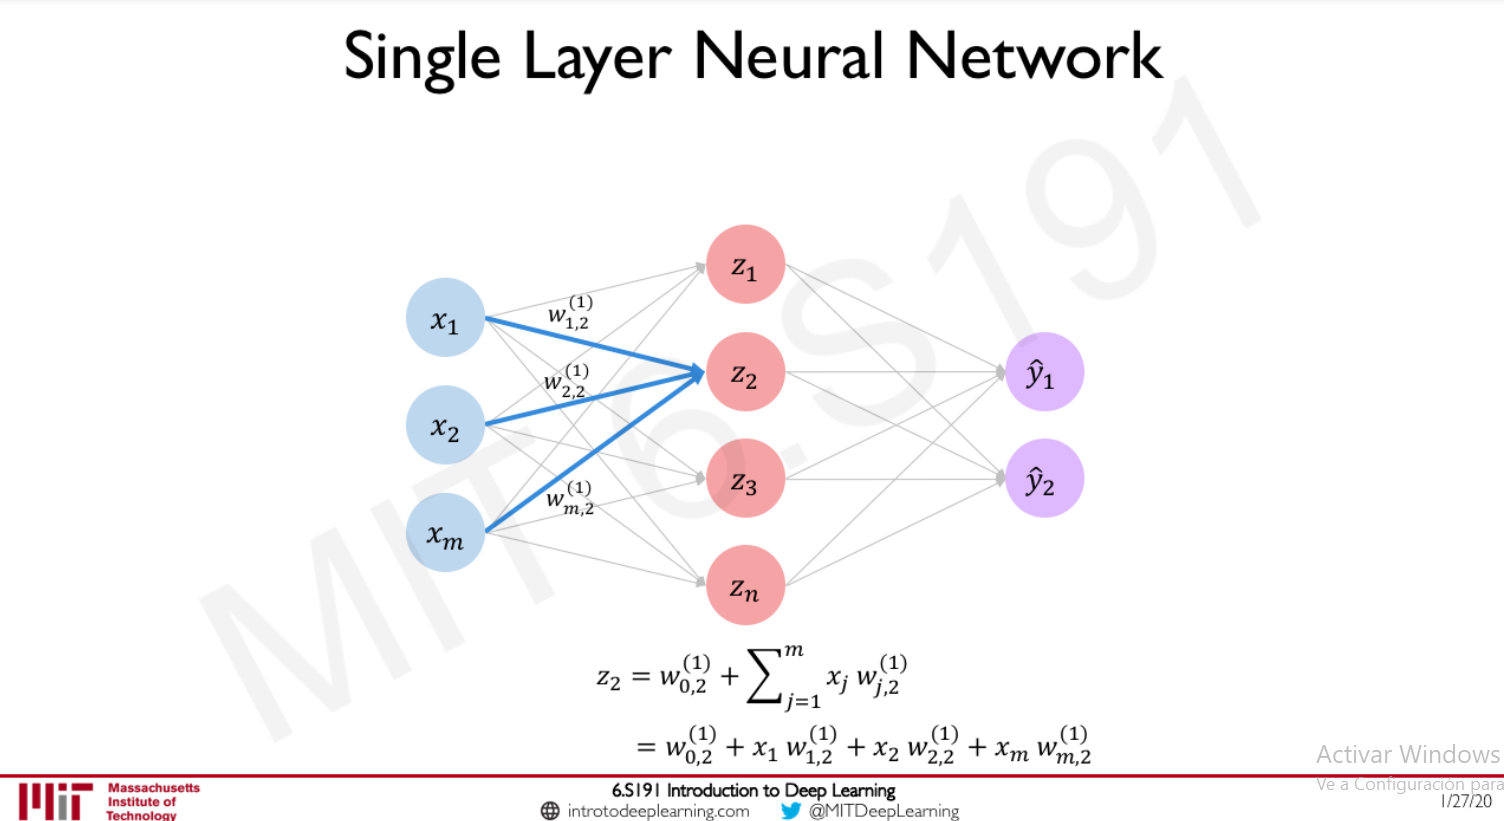

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Usage
if __name__ == "__main__":
    # Importing libraries
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    # Loading the dataset
    X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Training the Perceptron
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)

    # Making predictions
    predictions = p.predict(X_test)

    # Evaluating the model
    accuracy = np.sum(predictions == y_test) / len(y_test)
    print(f"Perceptron classification accuracy: {accuracy:.2f}")

Perceptron classification accuracy: 0.94


In [2]:
import numpy as np

class MultiOutputPerceptron:
    def __init__(self, n_outputs, learning_rate=0.01, n_iters=1000):
        self.n_outputs = n_outputs
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights
        self.weights = np.zeros((n_features, self.n_outputs))
        self.bias = np.zeros(self.n_outputs)

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += np.outer(x_i, update)
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Usage
if __name__ == "__main__":
    # Importing libraries
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    # Loading the dataset
    X, y = datasets.make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, random_state=123)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Training the Multi-Output Perceptron
    mop = MultiOutputPerceptron(n_outputs=3, learning_rate=0.01, n_iters=1000)
    mop.fit(X_train, y_train)

    # Making predictions
    predictions = mop.predict(X_test)

    # Evaluating the model
    accuracy = np.mean(predictions == y_test)
    print(f"Multi-Output Perceptron classification accuracy: {accuracy:.2f}")

Multi-Output Perceptron classification accuracy: 0.73


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class MyDenseLayer(Layer):
    def __init__(self, input_dim, output_dim):
        super(MyDenseLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = self.add_weight(shape=(input_dim, output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.W) + self.b
        output = tf.nn.sigmoid(z)
        return output

# Usage example
if __name__ == "__main__":
    # Create a model with a custom dense layer
    model = tf.keras.Sequential([
        MyDenseLayer(input_dim=4, output_dim=3)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Create some dummy data
    X = tf.random.normal((10, 4))
    y = tf.random.normal((10, 3))

    # Train the model
    model.fit(X, y, epochs=5)

    # Make predictions
    predictions = model(X)
    print(predictions)

Epoch 1/5
1/1 [==============================] - 1s 773ms/step - loss: 1.9432
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 1.9423
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 1.9414
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 1.9405
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 1.9395
tf.Tensor(
[[0.516757   0.51209086 0.5486834 ]
 [0.4964937  0.5188736  0.4995738 ]
 [0.51318103 0.49067214 0.5403151 ]
 [0.46191624 0.5308437  0.48782784]
 [0.51196164 0.4914965  0.4925742 ]
 [0.523297   0.50687695 0.525977  ]
 [0.52234    0.46832818 0.5007057 ]
 [0.53690046 0.45585603 0.47718024]
 [0.4876284  0.5361133  0.53428125]
 [0.4659502  0.522877   0.50626576]], shape=(10, 3), dtype=float32)


In [4]:
import numpy as np

class SingleLayerNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01, n_iters=1000):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lr = learning_rate
        self.n_iters = n_iters

        # Initialize weights
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = y.shape[0]
        error_output = output - y
        dW2 = np.dot(self.a1.T, error_output * self.sigmoid_derivative(output))
        db2 = np.sum(error_output * self.sigmoid_derivative(output), axis=0, keepdims=True)
        error_hidden = np.dot(error_output * self.sigmoid_derivative(output), self.W2.T)
        dW1 = np.dot(X.T, error_hidden * self.sigmoid_derivative(self.a1))
        db1 = np.sum(error_hidden * self.sigmoid_derivative(self.a1), axis=0, keepdims=True)

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, y):
        for _ in range(self.n_iters):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return np.where(output > 0.5, 1, 0)

# Usage
if __name__ == "__main__":
    # Create some dummy data
    np.random.seed(42)
    X = np.random.randn(1000, 10)
    y = (np.sum(X, axis=1) > 0).astype(int).reshape(-1, 1)

    # Initialize and train the network
    nn = SingleLayerNeuralNetwork(input_dim=10, hidden_dim=5, output_dim=1, learning_rate=0.01, n_iters=1000)
    nn.fit(X, y)

    # Make predictions
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == y)
    print(f"Single Layer Neural Network accuracy: {accuracy:.2f}")

Single Layer Neural Network accuracy: 1.00
